In [1]:
import pandas as pd
import numpy as np


In [10]:
data = pd.read_csv("01_Steps.csv")
data.head(10)
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         2454 non-null   object
 1   steps        2454 non-null   int64 
 2   distance     2454 non-null   int64 
 3   runDistance  2454 non-null   int64 
 4   calories     2454 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 96.0+ KB


In [11]:
data.describe()

,steps,distance,runDistance,calories
count,2454.000000,2454.000000,2454.000000,2454.000000
mean,8262.905460,5955.612469,826.986553,240.008150
std,6666.920001,4872.125039,1826.378002,213.678332
min,0.000000,0.000000,0.000000,0.000000
25%,3225.000000,2227.000000,153.000000,90.000000
50%,6983.000000,5010.000000,296.000000,190.000000
75%,11046.000000,7994.000000,600.000000,308.750000
max,38443.000000,29485.000000,21952.000000,2543.000000


In [12]:
data.head(10)

,date,steps,distance,runDistance,calories
0,2016-04-27,4948,3242,46,281
1,2016-04-28,16573,12060,79,751
2,2016-04-29,18002,12916,29,737
3,2016-04-30,4126,2981,11,207
4,2016-05-01,3869,2651,0,244
5,2016-05-02,10004,7330,0,426
6,2016-05-03,14565,11022,55,616
7,2016-05-04,6295,4341,0,315
8,2016-05-05,12424,10207,2968,587
9,2016-05-06,7964,5736,209,345


In [18]:
data.drop(["date"],axis=1,inplace=True)

In [20]:
data.corr(method="pearson")

,steps,distance,runDistance,calories
steps,1.000000,0.997864,0.321622,0.874705
distance,0.997864,1.000000,0.337200,0.880009
runDistance,0.321622,0.337200,1.000000,0.413243
calories,0.874705,0.880009,0.413243,1.000000


In [21]:
from matplotlib import pyplot as plt

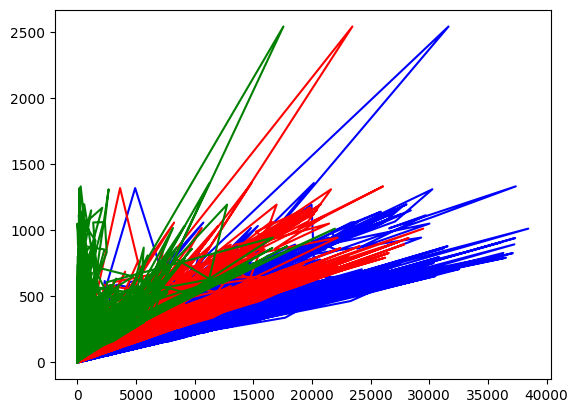

In [23]:
plt.plot(data["steps"],data["calories"],'b')
plt.plot(data["distance"],data["calories"],'r')
plt.plot(data["runDistance"],data["calories"],'g')
plt.show()




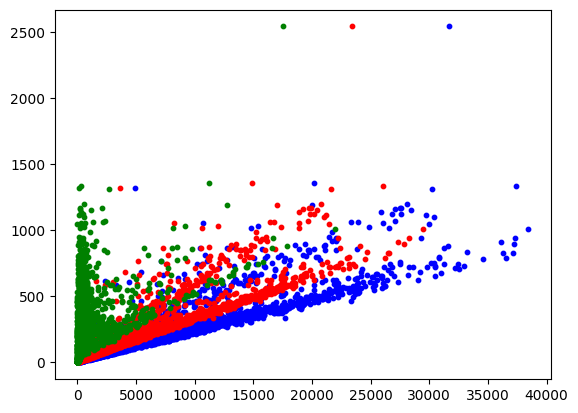

In [44]:
plt.scatter(data["steps"],data["calories"],color='b',s=10,marker="o")
plt.scatter(data["distance"],data["calories"],color='r',s=10,marker="o")
plt.scatter(data["runDistance"],data["calories"],color='g',s=10,marker="o")
plt.show()

ConversionError: Failed to convert value(s) to axis units: 'b'

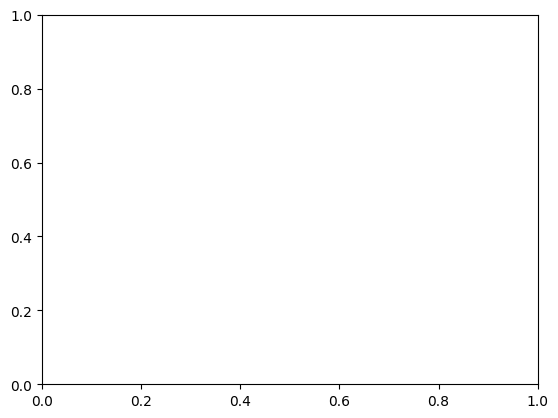

In [45]:
plt.bar(data["steps"],data["calories"],'b')
plt.bar(data["distance"],data["calories"],'r')
plt.bar(data["runDistance"],data["calories"],'g')
plt.show()

In [47]:
import seaborn as sns

<Axes: xlabel='steps'>

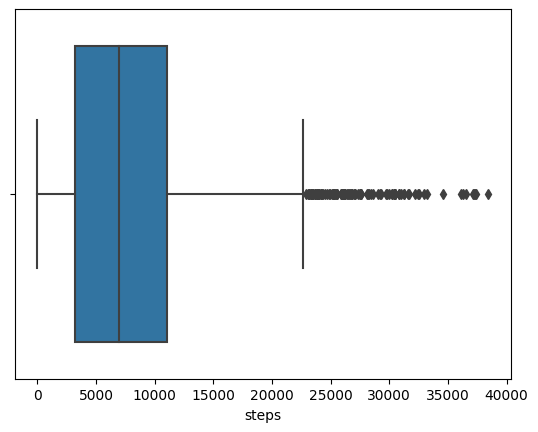

In [48]:
sns.boxplot(x= data['steps'])

In [54]:
from sklearn.model_selection import train_test_split as tts

In [53]:
x = data[["steps","distance","runDistance"]]
y=data[["calories"]]
x,y

(      steps  distance  runDistance
 0      4948      3242           46
 1     16573     12060           79
 2     18002     12916           29
 3      4126      2981           11
 4      3869      2651            0
 ...     ...       ...          ...
 2449   4451      2919         2495
 2450  11750      9207         7066
 2451  11623      8484         6506
 2452   4508      3169         2578
 2453   2104      1408         1176
 
 [2454 rows x 3 columns],
       calories
 0          281
 1          751
 2          737
 3          207
 4          244
 ...        ...
 2449       198
 2450       523
 2451       360
 2452       193
 2453       111
 
 [2454 rows x 1 columns])

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

In [56]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [57]:
X_train = scale.fit_transform(X_train)


In [58]:
Y_train = scale.fit_transform(Y_train)


In [59]:
X_test = scale.fit_transform(X_test)


In [60]:
Y_test = scale.fit_transform(Y_test)


In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [64]:
lr.coef_

array([[-0.15380589,  0.97979689,  0.15241145]])

In [65]:
predictions = lr.predict(X_test)
lr.score(X_test, Y_test)

0.7820523268107318

In [68]:
predictions.shape,residuals.shape

((737, 1), (737, 1))

In [70]:
residuals = predictions - Y_test

residual_table = pd.DataFrame(np.array({'residuals':residuals,
                               'predictions':predictions}).reshape(-1))
residual_table = residual_table.sort_values(by='predictions')

KeyError: 'predictions'